### Sección 1: Carga y EDA 

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA   
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Importar para guardar y cargar el modelo
import pickle

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/sleep_health.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


- **Person ID**	Identificador único de cada persona.
- **Gender**	Género de la persona (Male o Female).
- **Age**	Edad de la persona.
- **Occupation**	Profesión u ocupación de la persona.
- **Sleep Duration**	Duración promedio del sueño en horas.
- **Quality of Sleep**	Calidad del sueño (escala numérica, posiblemente de 1 a 10).
- **Physical Activity Level**	Nivel de actividad física (valor numérico, posiblemente en minutos o una escala).
- **Stress Level**	Nivel de estrés percibido (escala numérica).
- **MI Category**	Categoría de Índice de Masa Corporal (Underweight, Normal, Overweight, Obese).
- **Blood Pressure**	Presión arterial (formato: sistólica/diastólica).
- **Heart Rate**	Frecuencia cardíaca en reposo (latidos por minuto).
- **Daily Steps**	Número promedio de pasos diarios.
- **Sleep Disorder**	Tipo de trastorno del sueño diagnosticado (None, Insomnia, Sleep Apnea, etc.).

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

### Análisis Univariante y Análisis Variante

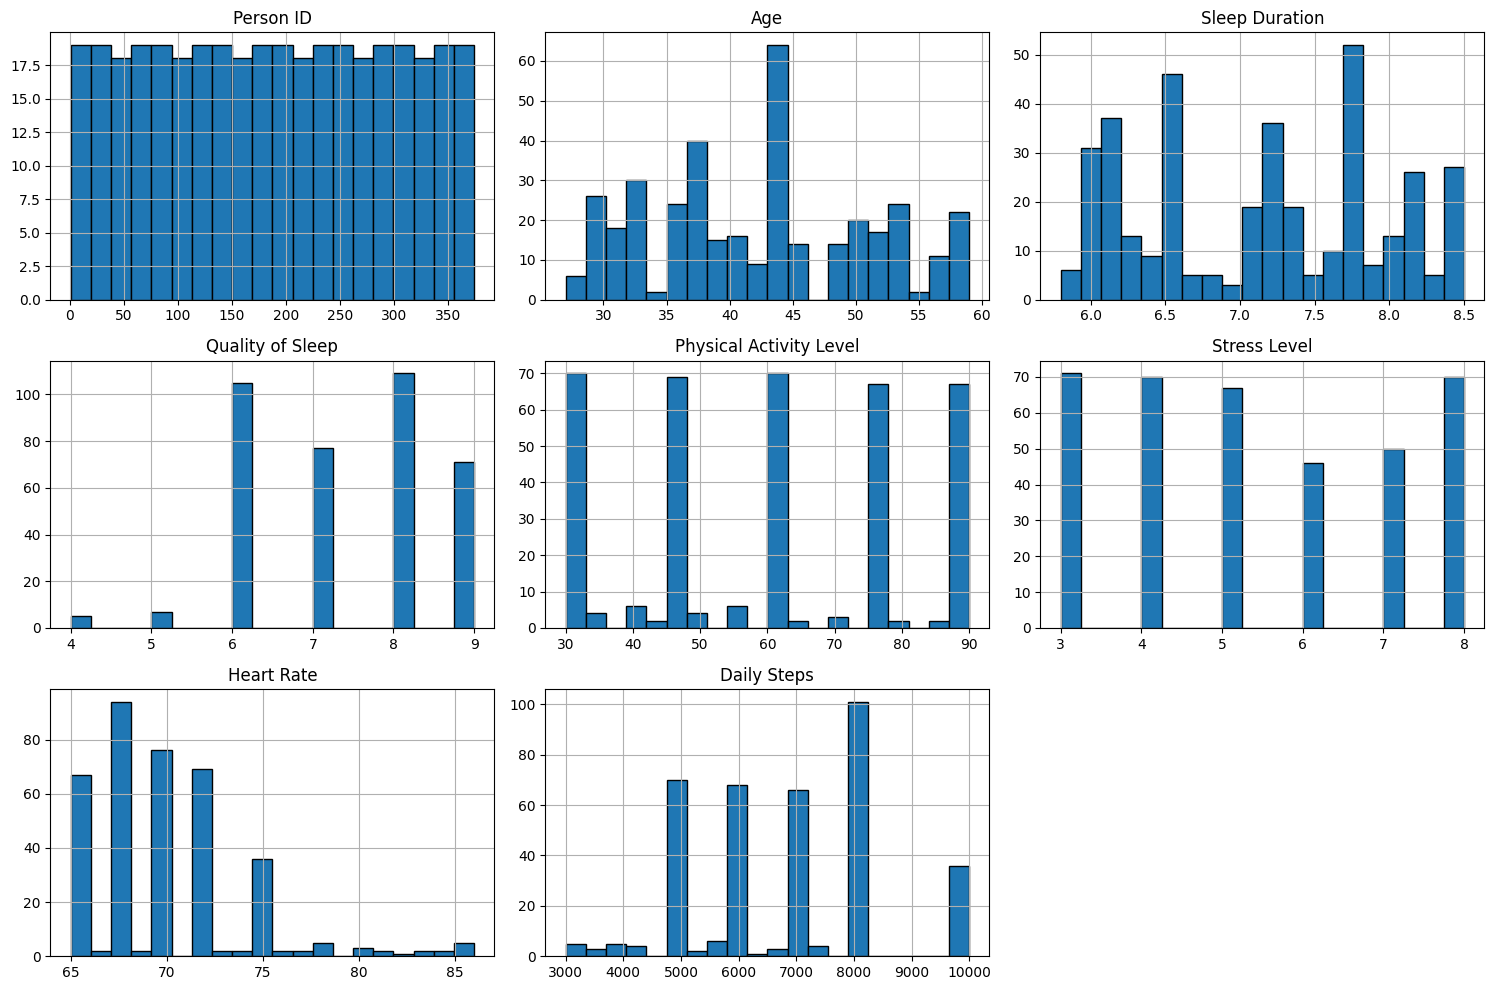

In [8]:
# Histograma para variables numéricas
df.hist(bins=20, figsize=(15,10), edgecolor='black')
plt.tight_layout()
plt.show()

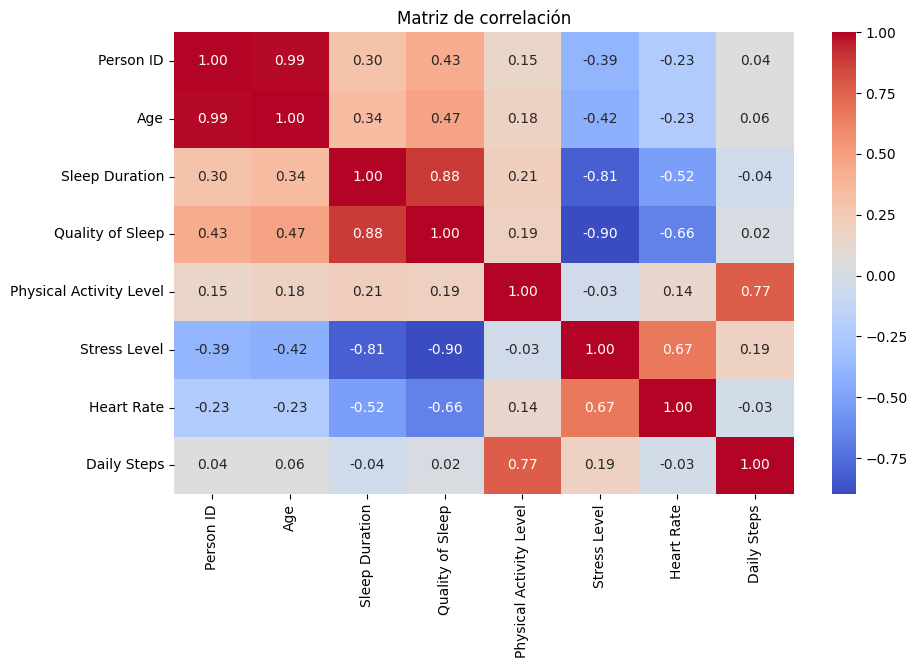

In [9]:
# Matriz de correlaciones
plt.figure(figsize=(10,6))

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

---
#### Se analiza si dormir más se relaciona con mejor calidad del sueño.

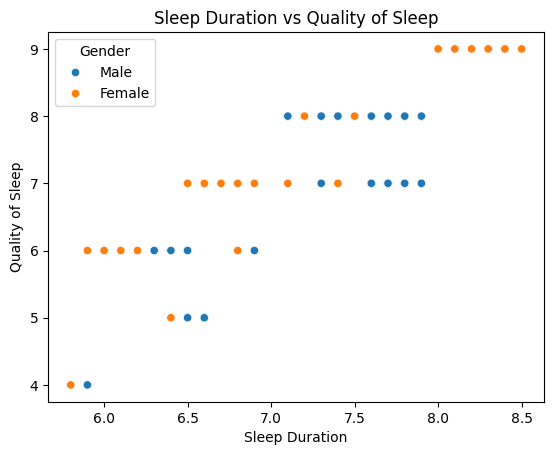

In [10]:
# Calidad de sueño vs. duración del sueño
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', hue='Gender', data=df)
plt.title('Sleep Duration vs Quality of Sleep')
plt.show()

---
#### Analizamos cómo varía la calidad del sueño entre quienes tienen o no trastornos.

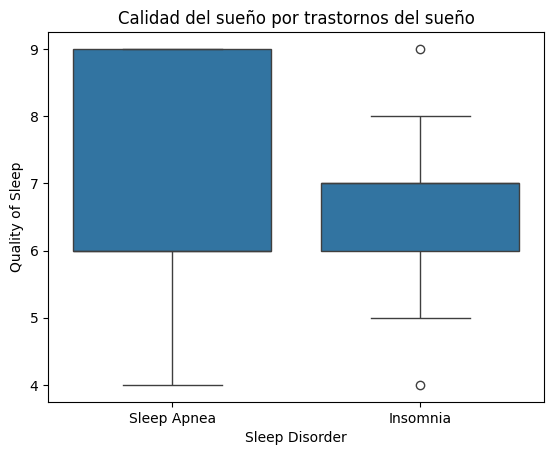

In [11]:
# Boxplot: Calidad de sueño por tipo de trastorno
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=df)
plt.title('Calidad del sueño por trastornos del sueño')
plt.show()


---
#### Distribución de la duración del sueño

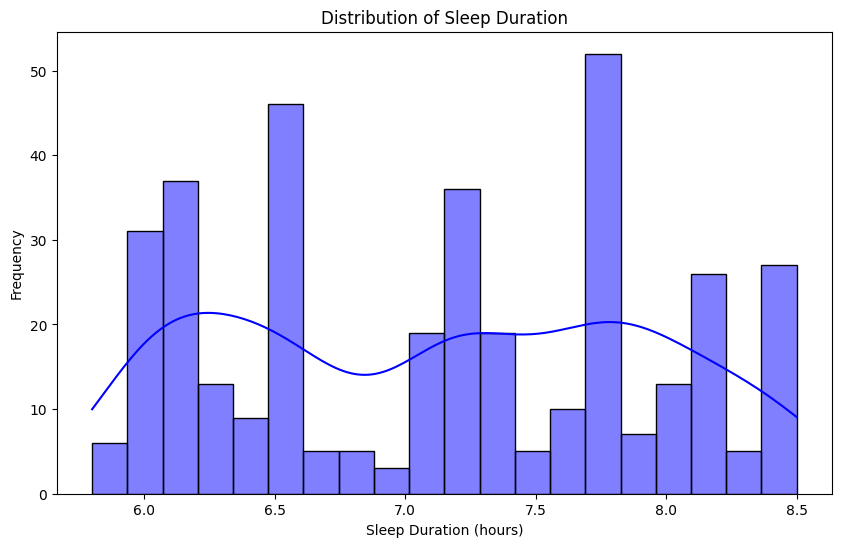

In [12]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], kde=True, bins=20, color='blue')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

---
#### Nos da una idea de cuántas personas tienen cada tipo de trastorno

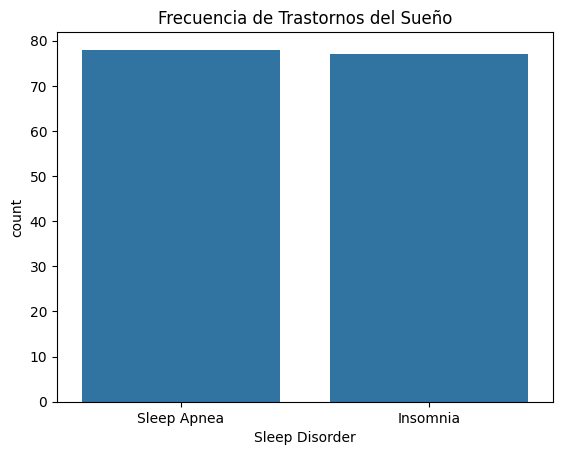

In [13]:
# Conteo de cada tipo de trastorno del sueño
sns.countplot(x='Sleep Disorder', data=df)
plt.title('Frecuencia de Trastornos del Sueño')
plt.show()


---
####  Relacionamos si más actividad física se relaciona con menos estrés

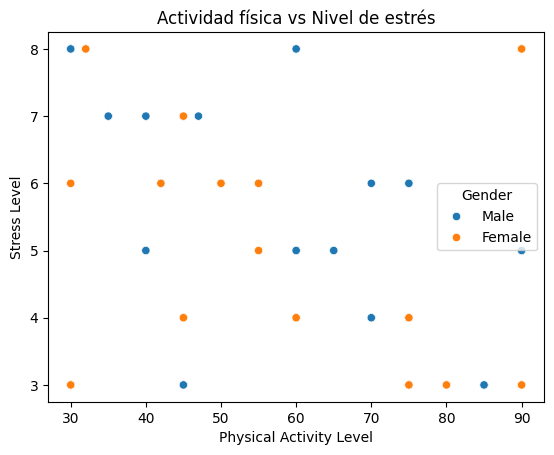

In [14]:
sns.scatterplot(x='Physical Activity Level', y='Stress Level', hue='Gender', data=df)
plt.title('Actividad física vs Nivel de estrés')
plt.show()


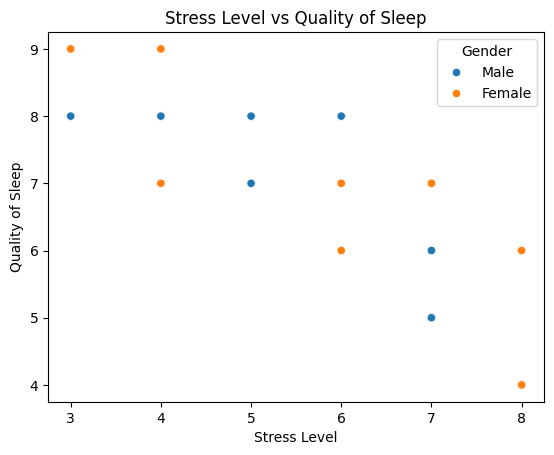

In [15]:
# Bivariate Analysis: Relationship between Stress Level and Quality of Sleep
sns.scatterplot(x='Stress Level', y='Quality of Sleep', hue='Gender', data=df)
plt.title('Stress Level vs Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

----

### Limpieza de datos, convertir object, decidir que hacer con ellos, y con los nulos